# Demo

## 导入相关库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression

## 训练模型

In [2]:
x_fearures = np.array([
    [-1, -2],
    [-2, -1],
    [-3, -2],
    [1, 3],
    [2, 1],
    [3, 2]
])
y_label = np.array([0, 0, 0, 1, 1, 1])

lr = LogisticRegression()
lr = lr.fit(x_fearures, y_label)

## 模型参数查看

In [3]:
print(f'the weight of logistic regression: {lr.coef_}')
print(f'the intercept(w0) of logistic regression: {lr.intercept_}')

the weight of logistic regression: [[0.73455784 0.69539712]]
the intercept(w0) of logistic regression: [-0.13139986]


## 数据和模型可视化

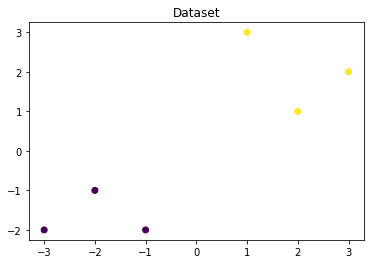

In [10]:
# 可视化数据样本点
plt.figure()
plt.scatter(x_fearures[:, 0], x_fearures[:, 1], c=y_label)
plt.title('Dataset')
plt.show()

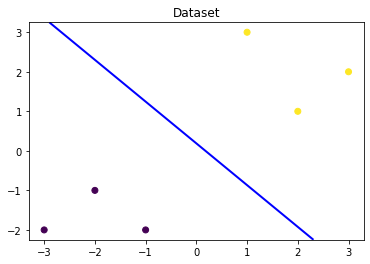

In [14]:
# 可视化决策边界
plt.figure()
plt.scatter(x_fearures[:, 0], x_fearures[:, 1], c=y_label)
plt.title('Dataset')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

z_proba = lr.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
z_proba = z_proba[:, 1].reshape(x_grid.shape)

plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2, colors='blue')

plt.show()

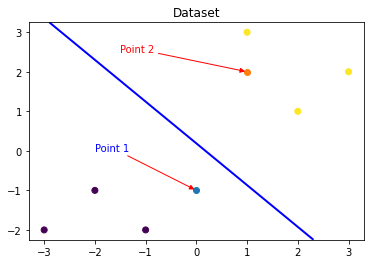

In [16]:
# 可视化预测样本
plt.figure()

xfp1 = np.array([[0, -1]])
plt.scatter(xfp1[:, 0],xfp1[:, 1])
plt.annotate(text='Point 1', xy=(0,-1), xytext=(-2,0), color='blue',
             arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))
xfp2 = np.array([[1, 2]])
plt.scatter(xfp2[:,0],xfp2[:,1])
plt.annotate(text='Point 2',xy=(1,2), xytext=(-1.5,2.5), color='red',
             arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

plt.scatter(x_fearures[:, 0], x_fearures[:, 1], c=y_label)
plt.title('Dataset')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

z_proba = lr.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
z_proba = z_proba[:, 1].reshape(x_grid.shape)

plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2, colors='blue')

plt.show()

## 模型预测

In [31]:
ylp1_predict = lr.predict(xfp1)
ylp2_predict = lr.predict(xfp2)

print(f'The point 1 predict class: \n{ylp1_predict}')
print(f'The point 2 predict class: \n{ylp2_predict}')

ylp1_predict_proba = lr.predict_proba(xfp1)
ylp2_predict_proba = lr.predict_proba(xfp2)

print(f'The point 1 predict probability of each class: \n{ylp1_predict_proba}')
print(f'The point 2 predict probability of each class: \n{ylp2_predict_proba}')


The point 1 predict class: 
[0]
The point 2 predict class: 
[1]
The point 1 predict probability of each class: 
[[0.69567724 0.30432276]]
The point 2 predict probability of each class: 
[[0.11983936 0.88016064]]


# 基于鸢尾花（iris）数据集的逻辑回归分类实践

## 导入相关库

In [19]:
import pandas as pd

## 数据读取

In [20]:
from sklearn.datasets import load_iris

data = load_iris()
iris_target = data.target
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names)

## 数据信息简单查看

In [21]:
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [22]:
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
iris_features.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [24]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
pd.Series(iris_target).value_counts()

2    50
1    50
0    50
dtype: int64

In [26]:
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 可视化描述

In [27]:
iris_all = iris_features.copy()
iris_all['target'] = iris_target

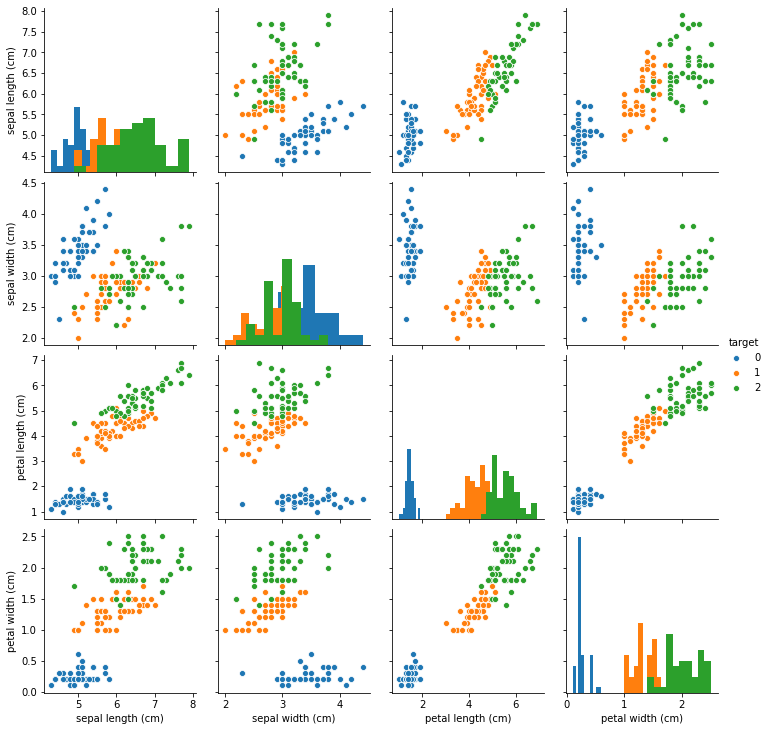

In [28]:
sb.pairplot(data=iris_all, diag_kind='hist', hue='target')
plt.show()

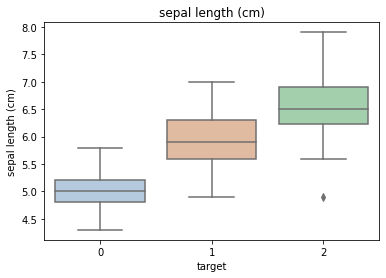

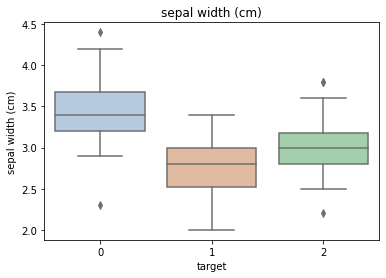

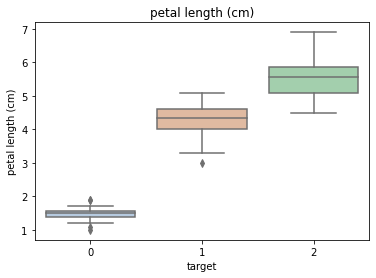

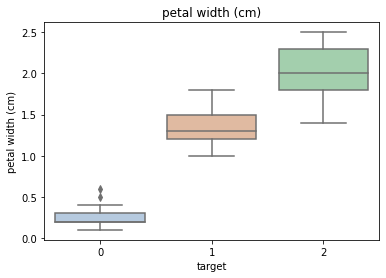

In [32]:
for col in iris_features.columns:
    sb.boxplot(x='target', y=col, saturation=0.5, palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

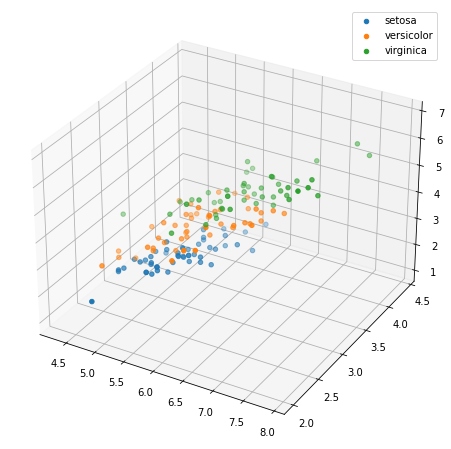

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

iris_all_cls0 = iris_all[iris_all['target'] == 0].values
iris_all_cls1 = iris_all[iris_all['target'] == 1].values
iris_all_cls2 = iris_all[iris_all['target'] == 2].values

ax.scatter(iris_all_cls0[:, 0], iris_all_cls0[:, 1], iris_all_cls0[:, 2], label='setosa')
ax.scatter(iris_all_cls1[:, 0], iris_all_cls1[:, 1], iris_all_cls1[:, 2], label='versicolor')
ax.scatter(iris_all_cls2[:, 0], iris_all_cls2[:, 1], iris_all_cls2[:, 2], label='virginica')

plt.legend()

plt.show()

## 利用逻辑回归模型在二分类上 进行训练和预测

In [34]:
from sklearn.model_selection import train_test_split

iris_features_part = iris_features.iloc[:100]
iris_target_part = iris_target[:100]

x_train, x_test, y_train, y_test = train_test_split(iris_features_part, iris_target_part, test_size=0.2, random_state=2020)

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(x_train, y_train)

print(f'The weight of logistic regression: {lr.coef_}')
print(f'The intercept(w0) of logistic regression: {lr.intercept_}')

The weight of logistic regression: [[ 0.45181973 -0.81743611  2.14470304  0.89838607]]
The intercept(w0) of logistic regression: [-6.53367714]


In [36]:
train_predict = lr.predict(x_train)
test_predict = lr.predict(x_test)

The accuracy of the logistic regression is: 1.0
The accuracy of the logistic regression is: 1.0
The confusion matrix result:
[[ 9  0]
 [ 0 11]]


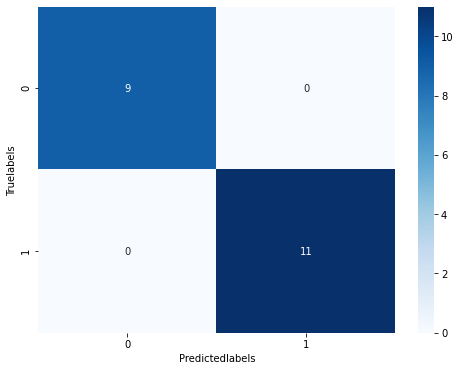

In [39]:
from sklearn import metrics

y_train_accuracy = metrics.accuracy_score(y_train, train_predict)
print(f'The accuracy of the logistic regression is: {y_train_accuracy}')
y_test_accuracy = metrics.accuracy_score(y_test, test_predict)
print(f'The accuracy of the logistic regression is: {y_test_accuracy}')

confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print(f'The confusion matrix result:\n{confusion_matrix_result}')

plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predictedlabels')
plt.ylabel('Truelabels')
plt.show()

## 利用逻辑回归模型在三分类(多分类)上 进行训练和预测

In [40]:
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size=0.2, random_state=2020)

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(x_train, y_train)

print(f'The weight of logistic regression: {lr.coef_}')
print(f'The intercept(w0) of logistic regression: {lr.intercept_}')

The weight of logistic regression: [[-0.45928925  0.83069893 -2.26606528 -0.99743983]
 [ 0.3311732  -0.72863427 -0.06841147 -0.98711029]
 [ 0.12811605 -0.10206466  2.33447675  1.98455011]]
The intercept(w0) of logistic regression: [  9.43880646   3.93047366 -13.36928012]


In [41]:
train_predict = lr.predict(x_train)
test_predict = lr.predict(x_test)

train_predict_proba = lr.predict_proba(x_train)
test_predict_proba = lr.predict_proba(x_test)

print(f'The test predict probability of each class:\n{test_predict_proba}')

y_train_accuracy = metrics.accuracy_score(y_train, train_predict)
print(f'The accuracy of the logistic regression is: {y_train_accuracy}')
y_test_accuracy = metrics.accuracy_score(y_test, test_predict)
print(f'The accuracy of the logistic regression is: {y_test_accuracy}')

The test predict probability of each class:
[[1.03461744e-05 2.33279483e-02 9.76661706e-01]
 [9.69926591e-01 3.00732871e-02 1.21677015e-07]
 [2.09992556e-02 8.69156613e-01 1.09844131e-01]
 [3.61934880e-03 7.91979964e-01 2.04400687e-01]
 [7.90943232e-03 8.00605296e-01 1.91485272e-01]
 [7.30034942e-04 6.60508053e-01 3.38761912e-01]
 [1.68614215e-04 1.86322047e-01 8.13509339e-01]
 [1.06915328e-01 8.90815535e-01 2.26913686e-03]
 [9.46928073e-01 5.30707268e-02 1.20016068e-06]
 [9.62346387e-01 3.76532212e-02 3.91897324e-07]
 [1.19533395e-04 1.38823471e-01 8.61056996e-01]
 [8.78881871e-03 6.97207353e-01 2.94003828e-01]
 [9.73938144e-01 2.60617329e-02 1.22613847e-07]
 [1.78434060e-03 4.79518175e-01 5.18697484e-01]
 [5.56924355e-04 2.46776840e-01 7.52666235e-01]
 [9.83549843e-01 1.64500655e-02 9.13617321e-08]
 [1.65201472e-02 9.54672748e-01 2.88071050e-02]
 [8.99853771e-03 7.82707572e-01 2.08293890e-01]
 [2.98015044e-05 5.45900080e-02 9.45380191e-01]
 [9.35695859e-01 6.43039552e-02 1.85301400e-

In [44]:
confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print(f'The confusion matrix result:\n{confusion_matrix_result}')

The confusion matrix result:
[[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


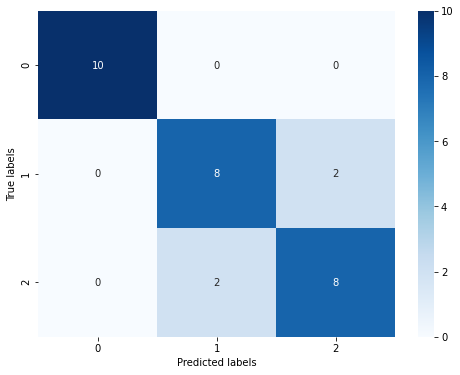

In [45]:
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()